In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Train image classifier

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
def binarize(img):
    img = image.img_to_array(img, dtype='uint8')
    binarized = np.expand_dims(cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2), -1)
    inverted_binary_img = ~binarized
    return inverted_binary_img

In [4]:
data_dir = 'model/data_copy'
batch_size = 32
img_height = 45
img_width = 45

In [5]:
train_datagen = ImageDataGenerator(
    preprocessing_function=binarize)

In [6]:
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="categorical",
        seed=123)

Found 258788 images belonging to 32 classes.


In [7]:
# Class names
class_names = [k for k,v in train_generator.class_indices.items()]
class_names

['(',
 ')',
 '*',
 '+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '<',
 '<=',
 '=',
 '>',
 '>=',
 '[',
 ']',
 'div',
 'e',
 'pi',
 'times',
 'x',
 'y',
 'z',
 '{',
 '}']

In [8]:
labels = train_generator.classes  # array of class indices for each image
class_indices = train_generator.class_indices  # dict: class name -> class index
class_names = list(class_indices.keys())

In [9]:
counts = np.bincount(labels)
for name, count in zip(class_names, counts):
    print(f"{name}: {count} images")

(: 14294 images
): 14355 images
*: 7500 images
+: 25112 images
-: 33997 images
0: 6914 images
1: 26520 images
2: 26141 images
3: 10909 images
4: 7396 images
5: 3545 images
6: 3118 images
7: 2909 images
8: 3068 images
9: 3737 images
:: 199 images
<: 477 images
<=: 973 images
=: 13104 images
>: 258 images
>=: 693 images
[: 778 images
]: 780 images
div: 868 images
e: 3003 images
pi: 2332 images
times: 3251 images
x: 26594 images
y: 9340 images
z: 5870 images
{: 376 images
}: 377 images


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, InputLayer)

In [53]:
num_classes = 32 
input_shape = (45, 45, 1) 
model = Sequential([
    InputLayer(input_shape=input_shape),
    
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.30),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.40),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         8,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 967,808 (3.69 MB)

 Trainable params: 967,168 (3.69 MB)

 Non-trainable params: 640 (2.50 KB)

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [17]:
model.fit(
  train_generator,
  epochs=10
)

/Users/abhaychougala/ml_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 686s 85ms/step - accuracy: 0.8327 - loss: 0.6388
Epoch 2/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 888s 110ms/step - accuracy: 0.9401 - loss: 0.1963
Epoch 3/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 984s 122ms/step - accuracy: 0.9538 - loss: 0.1403
Epoch 4/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 1209s 150ms/step - accuracy: 0.9623 - loss: 0.1135
Epoch 5/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 1354s 167ms/step - accuracy: 0.9657 - loss: 0.1030
Epoch 6/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 1594s 197ms/step - accuracy: 0.9680 - loss: 0.0951
Epoch 7/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 1513s 187ms/step - accuracy: 0.9685 - loss: 0.0921
Epoch 8/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 2638s 326ms/step - accuracy: 0.9698 - loss: 0.0891
Epoch 9/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 3452s 427ms/step - accuracy: 0.9702 - loss: 0.0878
Epoch 10/10
8088/8088 ━━━━━━━━━━━━━━━━━━━━ 1035s 128ms/step - accuracy: 0.9711 - loss: 0.0856


In [18]:
model.save('eqn-detect-model-32classes.keras')

# 2. Detect objects from equation image

In [9]:
image_dir = "equation_images/"

In [10]:
def getOverlap(a, b):
     return max(0, min(a[1], b[1]) - max(a[0], b[0]))
def detect_contours(img_path):
    # Given an image path, output bounding box coordinates of an image
    input_image = cv2.imread(img_path, 0) # Load a greyscale image
 
    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert the grayscale image to binary (image binarization opencv python), then invert
    binarized = cv2.adaptiveThreshold(input_image_cpy,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    inverted_binary_img = ~binarized

    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours
    # Detect contours
    l = []
    for c in contours_list:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # Check whether any overlapping rectangles. We do this in a way such that we only compare each box once with all other boxes.
    lcopy = l.copy()
    keep = []
    while len(lcopy) != 0:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0) # Look at next box
        if curr_w * curr_h < 20: # remove very small boxes
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x+curr_w]
            next_interval = [x, x+w]
            if getOverlap(curr_interval, next_interval) > 1 : # more than 3 pixels overlap, this is arbitrary
                # Merge the two intervals
                new_interval_x = [min(curr_x, x), max(curr_x+curr_w, x+w)]
                new_interval_y = [min(curr_y, y), max(curr_y+curr_h, y+h)]
                newx, neww = new_interval_x[0], new_interval_x[1] - new_interval_x[0]
                newy, newh = new_interval_y[0], new_interval_y[1] - new_interval_y[0]
                curr_x, curr_y, curr_w, curr_h = newx, newy, neww, newh
                throw.append(i) # Mark this box to throw away later, since it has now been merged with current box
        for ind in sorted(throw, reverse=True): # Sort in reverse order otherwise we will pop incorrectly
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h]) # Keep the current box we are comparing against
    return keep

In [56]:
IMAGE = "math_1.jpeg"
img_path = "equation_images/"+IMAGE
input_image = cv2.imread(img_path, 0) 
input_image_cpy = input_image.copy()
keep = detect_contours(image_dir+IMAGE)

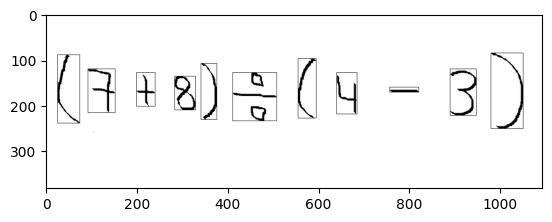

In [57]:
#Visualise how the bounding boxes look like
for (x, y, w, h) in keep:
    cv2.rectangle(input_image_cpy, (x, y), (x + w, y + h), (0, 0, 255), 1)
plt.imshow(input_image_cpy, cmap='gray')
plt.show()

# 3. Predict with model

In [13]:
import cv2
import numpy as np

def resize_pad(img, size, padColor=255):
    h, w = img.shape[:2]
    sh, sw = size

    # Choose interpolation method
    interp = cv2.INTER_AREA if h > sh or w > sw else cv2.INTER_CUBIC

    # Aspect ratio
    aspect = w / h

    # Compute new dimensions and padding
    if aspect > 1:  # Horizontal image
        new_w = sw
        new_h = round(new_w / aspect)
        pad_top, pad_bot = (sh - new_h) // 2, (sh - new_h) - (sh - new_h) // 2
        pad_left, pad_right = 0, 0
    elif aspect < 1:  # Vertical image
        new_h = sh
        new_w = round(new_h * aspect)
        pad_left, pad_right = (sw - new_w) // 2, (sw - new_w) - (sw - new_w) // 2
        pad_top, pad_bot = 0, 0
    else:  # Square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # Handle pad color for grayscale images
    if len(img.shape) == 2 and isinstance(padColor, (list, tuple)):  
        padColor = padColor[0]  

    # Resize and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right,
                                    borderType=cv2.BORDER_CONSTANT, value=padColor)
    return scaled_img


In [14]:
# Load mode
new_model = tf.keras.models.load_model('eqn-detect-model-32classes.keras')

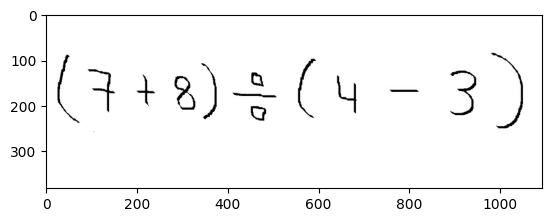

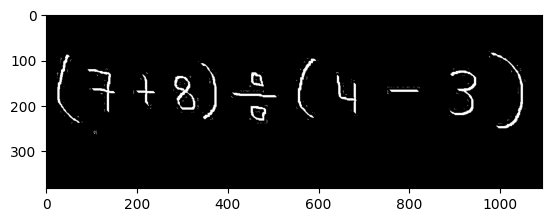

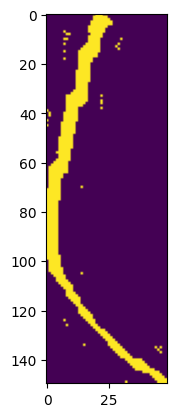

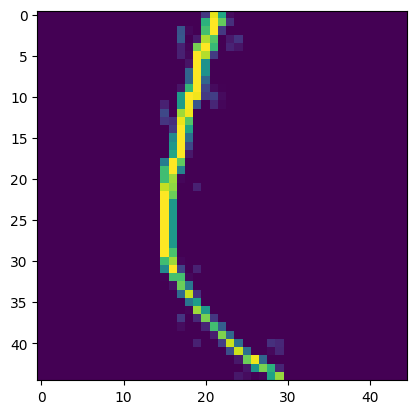

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
(


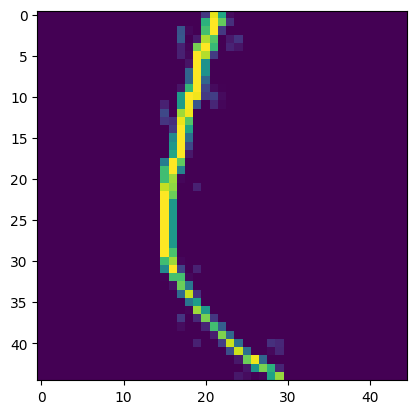

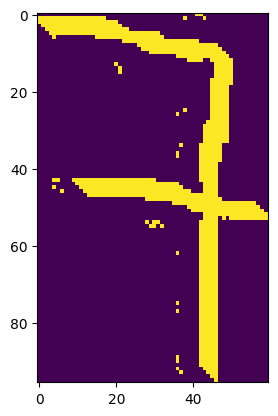

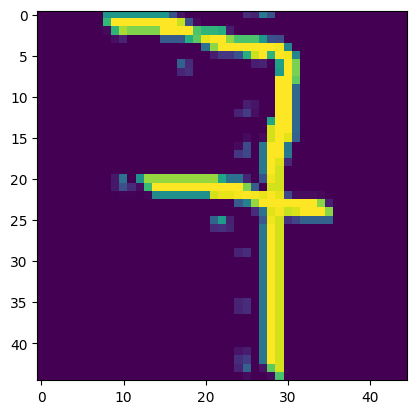

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7


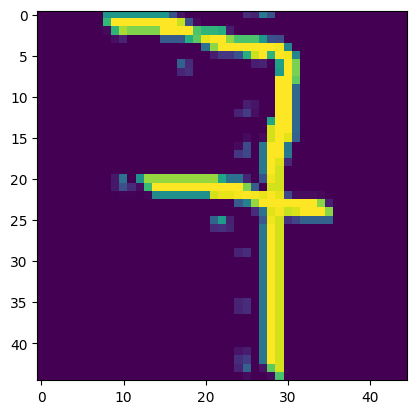

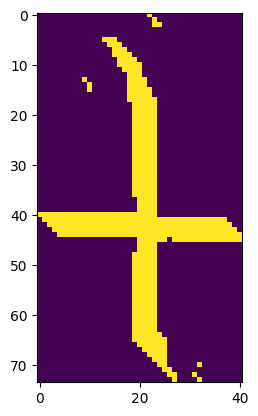

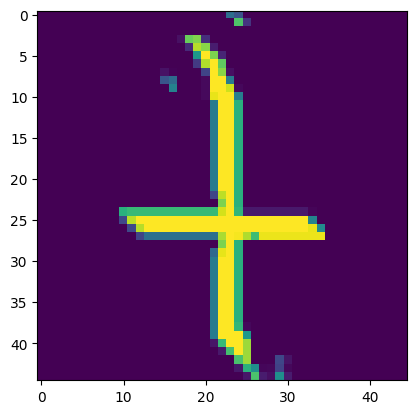

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
+


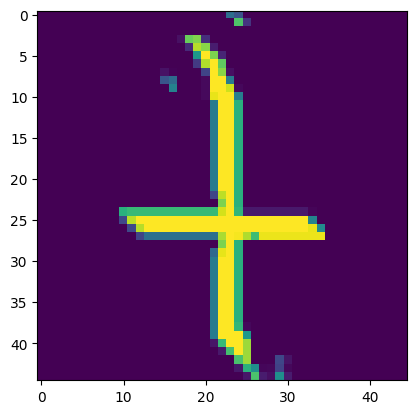

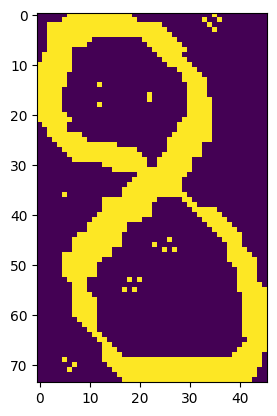

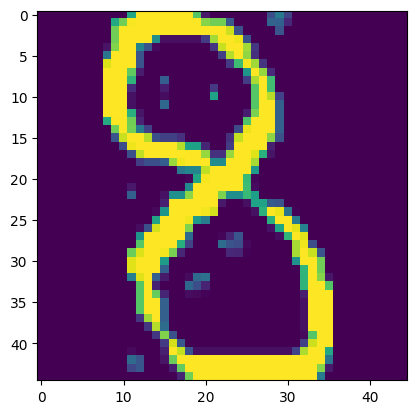

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
8


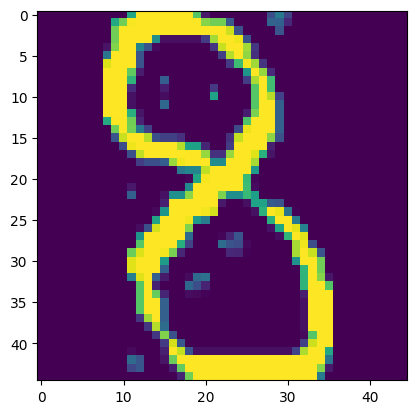

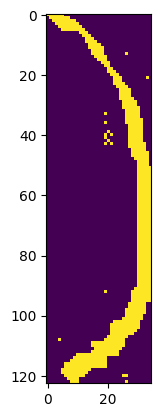

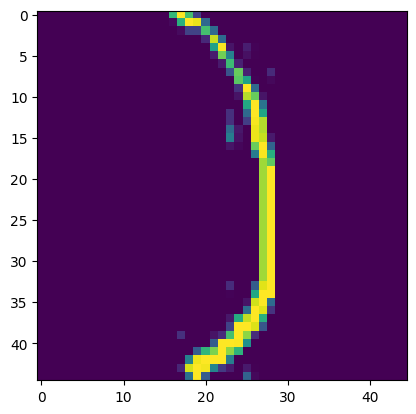

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
)


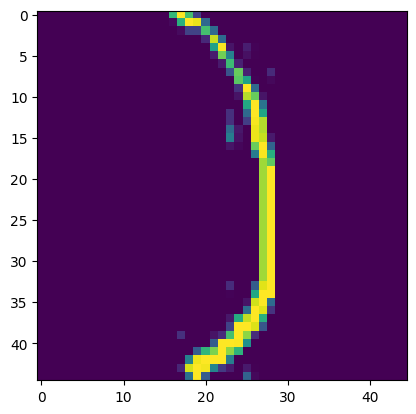

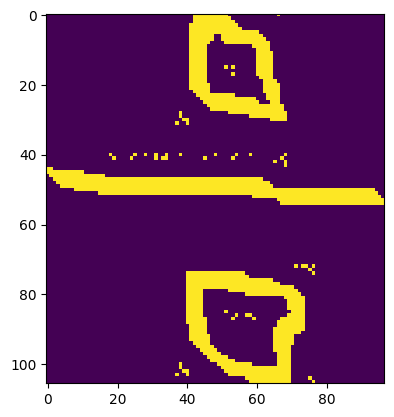

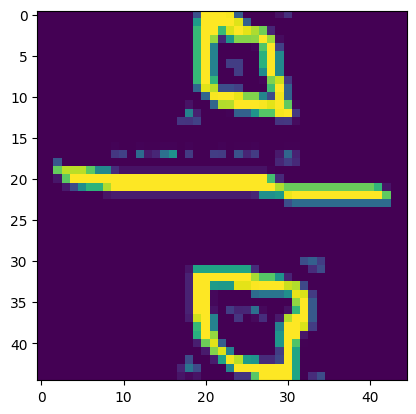

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
/


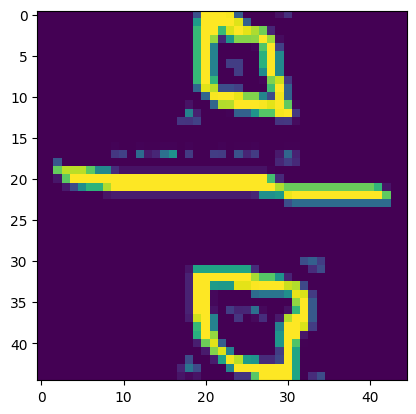

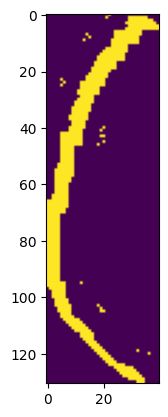

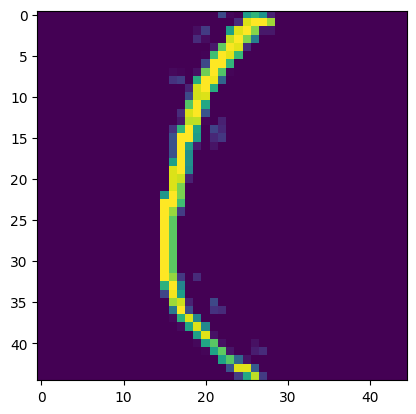

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(


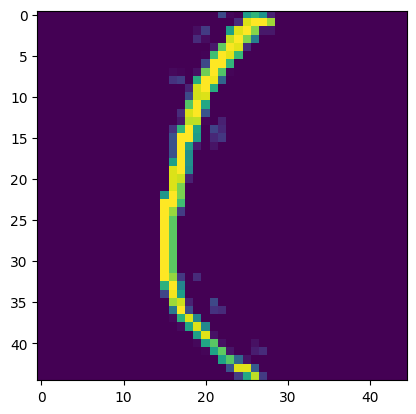

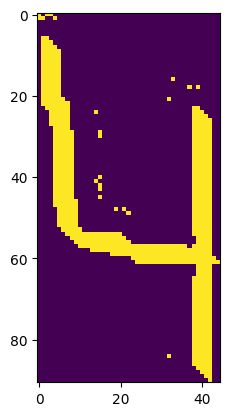

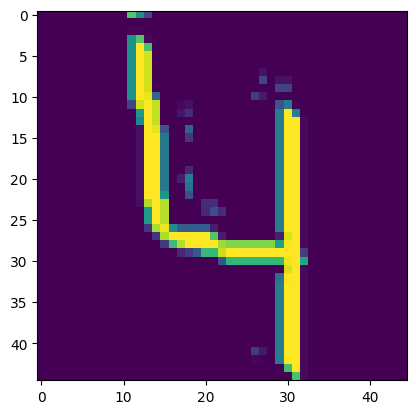

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4


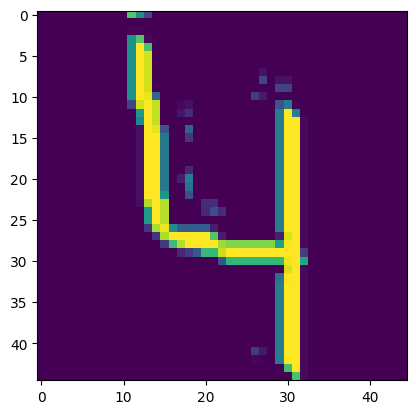

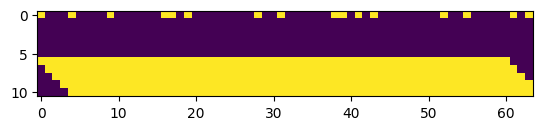

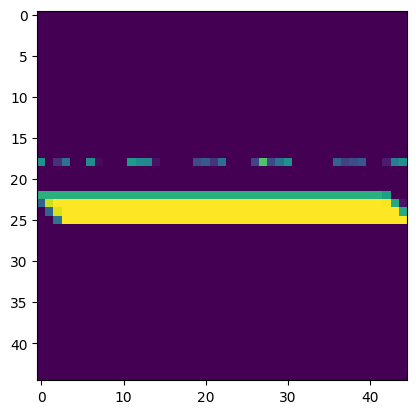

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
-


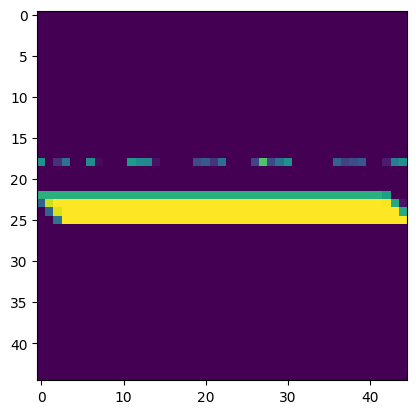

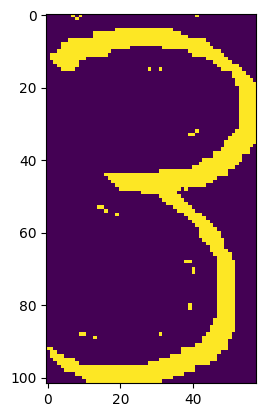

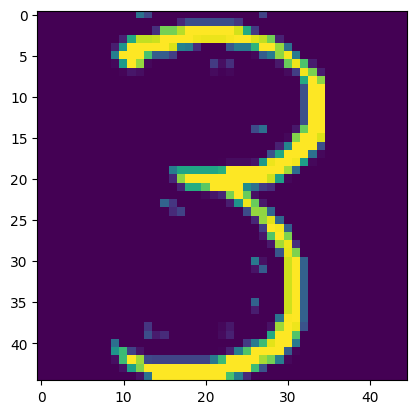

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3


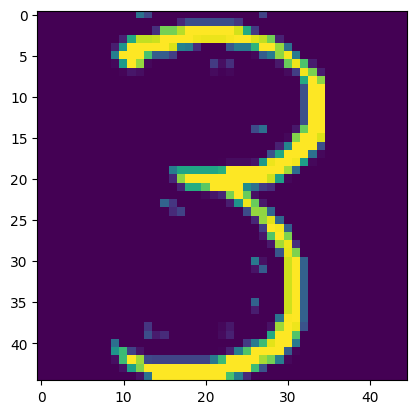

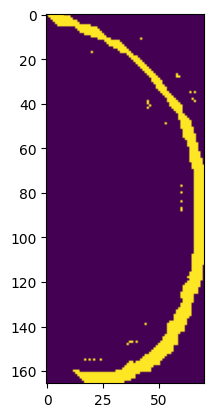

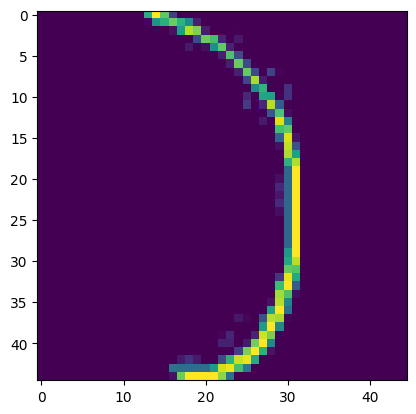

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
)


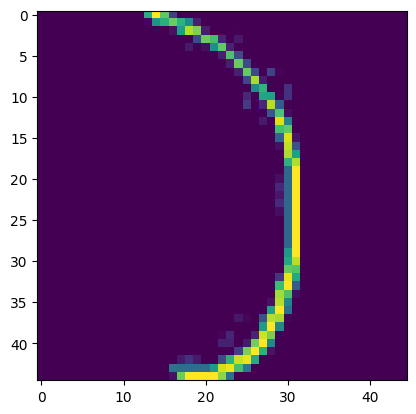

(7+8)/(4-3)


In [58]:
eqn_list = []

# binarize the input image
IMAGE = "math_1.jpeg"
img_path = "equation_images/"+IMAGE
input_image = cv2.imread(img_path, 0) 
inverted_binary_img = binarize(input_image)
plt.imshow(input_image, cmap='gray')
plt.show()
plt.imshow(inverted_binary_img, cmap='gray')
plt.show()

for (x, y, w, h) in sorted(keep, key = lambda x: x[0]):
    plt.imshow(inverted_binary_img[y:y+h, x:x+w])
    plt.show()
    img = resize_pad(inverted_binary_img[y:y+h, x:x+w], (45, 45), 0) # We must use the binarized image to predict
    plt.imshow(img)
    plt.show()
    pred_class = class_names[np.argmax(new_model.predict(tf.expand_dims(tf.expand_dims(img, 0), -1)))]
    if pred_class == "times":
        pred_class = "*"
    if pred_class == "div" or pred_class == "forward_slash":
        pred_class = "/"
    eqn_list.append(pred_class)
    print(pred_class)
    plt.imshow(img)
    plt.show()
eqn = "".join(eqn_list)
print(eqn)

In [59]:
eqn 

'(7+8)/(4-3)'

In [60]:
import re
def classify_expression(expr):
    expr = expr.strip()
    tokens = tokenize(expr)
    
    # Linear inequality
    if re.search(r'[<>=]{1,2}', expr) and re.search(r'[a-zA-Z]', expr):
        if any(op in expr for op in ['<', '>', '<=', '>=']):
            return 'linear_inequality'
        return 'algebraic'

    # Algebraic equation
    if '=' in expr and re.search(r'[a-zA-Z]', expr):
        return 'algebraic'
    
    # Prefix
    if tokens[0] in '+-*/^' and len(tokens) >= 3:
        return 'prefix'
    
    # Postfix
    if tokens[-1] in '+-*/^' and len(tokens) >= 3:
        return 'postfix'

    # Default: Arithmetic
    return 'arithmetic'

In [39]:
def tokenize(expr):
    # If space-separated, just split
    if ' ' in expr:
        return expr.split()
    # Otherwise, split into list of individual characters (digits/operators)
    return list(expr)


In [50]:
from sympy import Eq, symbols, solve, sympify
from sympy.parsing.sympy_parser import parse_expr, standard_transformations, implicit_multiplication_application

x = symbols('x')

def solve_expression(expr_type, expr):
    tokens = tokenize(expr)
    
    if expr_type == 'arithmetic':
        return eval(expr)
    
    elif expr_type == 'postfix':
        stack = []
        for token in tokens:
            if token in "+-*/":
                b = stack.pop()
                a = stack.pop()
                result = eval(f"{a} {token} {b}")
                stack.append(result)
            else:
                stack.append(float(token))
        return stack[0]
    
    elif expr_type == 'prefix':
        def eval_prefix(tokens):
            token = tokens.pop(0)
            if token in "+-*/":
                a = eval_prefix(tokens)
                b = eval_prefix(tokens)
                return eval(f"{a} {token} {b}")
            else:
                return float(token)
        return eval_prefix(tokens)

    elif expr_type == 'algebraic':
        lhs, rhs = expr.split('=')
        transformations = (standard_transformations + (implicit_multiplication_application,))
        equation = Eq(parse_expr(lhs, transformations=transformations),parse_expr(rhs, transformations=transformations))

        return solve(equation)

    elif expr_type == 'linear_inequality':
        transformations = (standard_transformations + (implicit_multiplication_application,))
        parsed_expr = parse_expr(expr, transformations=transformations)
        return solve(parsed_expr)

    
    else:
        return "Unsupported type"


In [51]:
def process_expression(expr):
    expr_type = classify_expression(expr)
    print(f"Type Detected: {expr_type}")
    return solve_expression(expr_type, expr)

In [61]:
process_expression(eqn)

Type Detected: arithmetic


15.0

In [62]:
model = tf.keras.models.load_model("eqn-detect-model-32classes.keras")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 45, 45, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,902,146 (11.07 MB)

 Trainable params: 967,168 (3.69 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 1,934,338 (7.38 MB)

In [50]:
print(X.shape)


(258788, 32, 32, 1, 1)


Total Classes: 32
Total Images: 258788

'(': 14294
')': 14355
'*': 7500
'+': 25112
'-': 33997
'0': 6914
'1': 26520
'2': 26141
'3': 10909
'4': 7396
'5': 3545
'6': 3118
'7': 2909
'8': 3068
'9': 3737
':': 199
'<': 477
'<=': 973
'=': 13104
'>': 258
'>=': 693
'[': 778
']': 780
'div': 868
'e': 3003
'pi': 2332
'times': 3251
'x': 26594
'y': 9340
'z': 5870
'{': 376
'}': 377


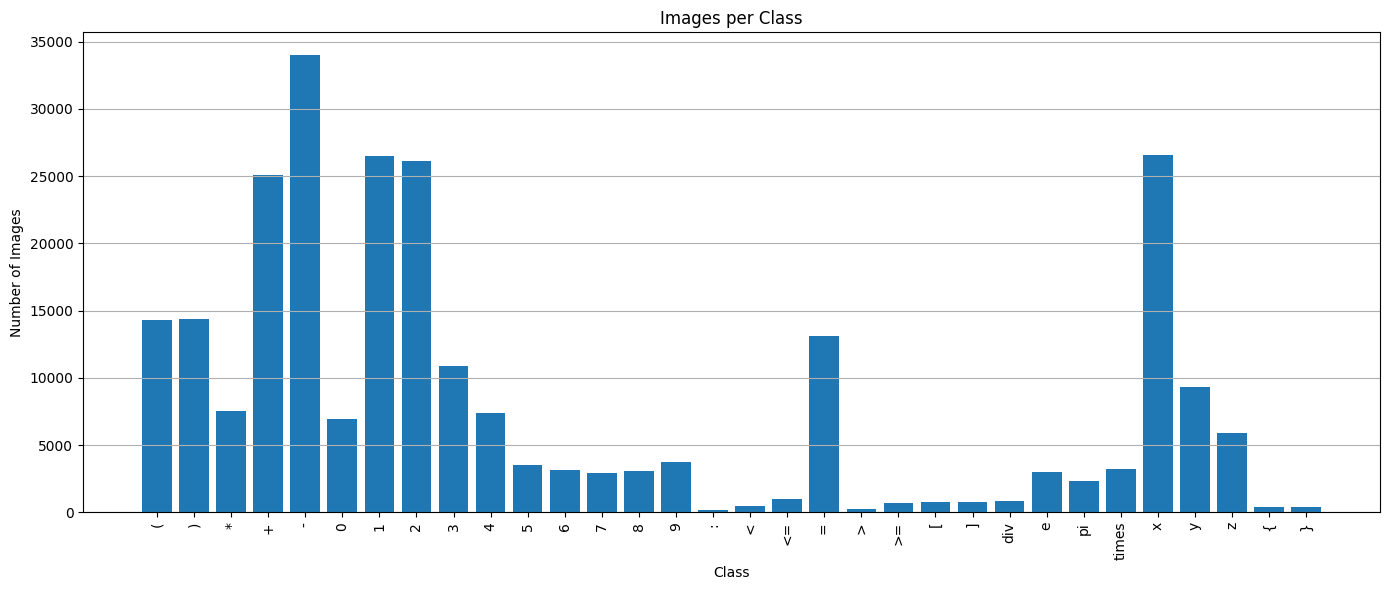

In [68]:
import os
import matplotlib.pyplot as plt
import cv2
from collections import Counter

# Path to your dataset
DATASET_PATH = "model/data_copy"  # change if needed

# List of classes
classes = sorted(os.listdir(DATASET_PATH))
class_counts = {}

# Count images per class
for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = num_images


print(f"Total Classes: {len(classes)-1}")
print(f"Total Images: {sum(class_counts.values())}\n")

for cls, count in class_counts.items():
    print(f"'{cls}': {count}")

# Plot class distribution
plt.figure(figsize=(14, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
